# AIRDOS Clibration

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import matplotlib.pyplot as plt

In [2]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


## Read Logfile

In [7]:
fto = './data/DATALOG.TXT' #  File to Open
l=[]
l.extend(range(0,548))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*')

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

## Energy spectrum preview

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


TypeError: Empty 'DataFrame': no numeric data to plot

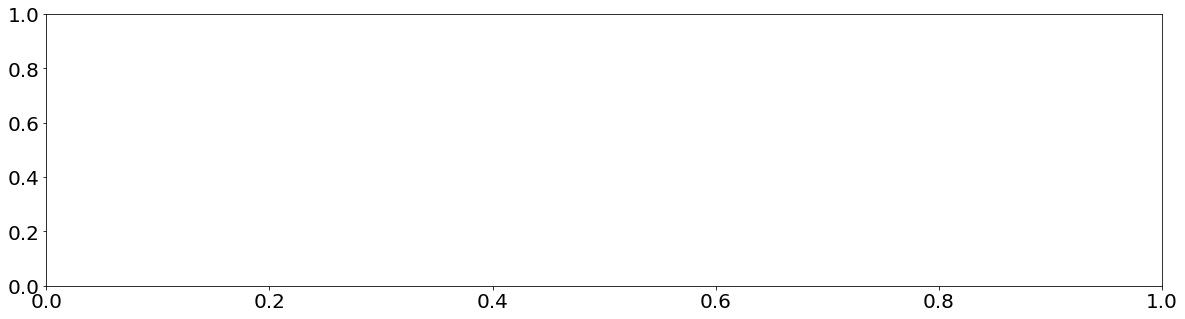

In [4]:
xfrom = 82800
xto = 83800 #np.nan

matplotlib.rcParams.update({'font.size': 20})

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(24,544)].sum(axis=1)
rc['sum'] = rc[range(22,544)].sum(axis=1)
#rc['sum']

plt.figure(figsize=(20,5))

#rc['sum'].plot()
rc.ix[xfrom:xto,'sum'].plot()

plt.title('AIRDOS (HIMAC, 2017-06)')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 11 s]')

ener1 = rc.ix[xfrom:xto,22:520].sum()
 
plt.figure(figsize=(20,5))
plt.ylim([0,2000])
#plt.yscale('log')
plt.plot(ener1)

plt.figure(figsize=(20,5))
plt.plot(ener1)
plt.ylim([0,200])
#plt.legend()
plt.title('AIRDOS (HIMAC, 2017-06)')
plt.xlabel('channel')
plt.ylabel('count')
plt.xticks(range(0,600,50))
plt.grid()


## Calculate Flux

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


TypeError: Empty 'DataFrame': no numeric data to plot

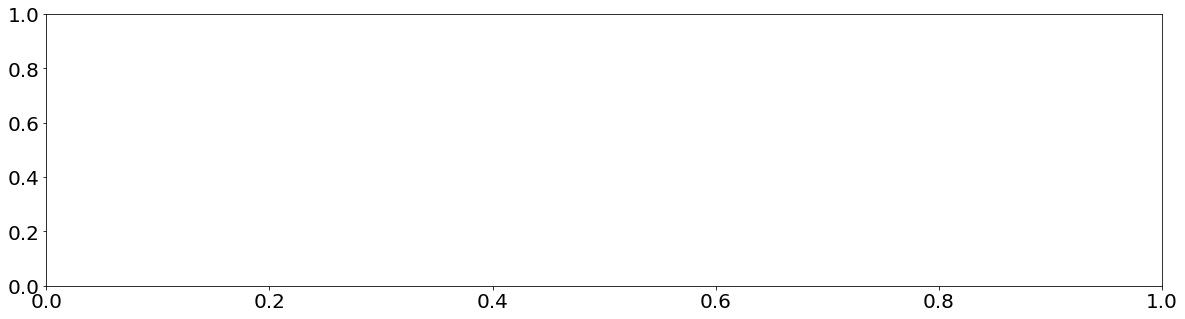

In [9]:
rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(24,544)].sum(axis=1)
rc['sum'] = rc[range(22,544)].sum(axis=1)
#rc['sum']

plt.figure(figsize=(20,5))

#rc['sum'].plot()
rc.ix[50775:51350,'sum'].plot()

#plt.ylim([0,20])
e1 = [0,10]
e2 = [0,0]
e3 = [0,0]
e4 = [0,0]

rc.ix[e1[0]:e1[1],'sum'].plot(c='b')
rc.ix[e2[0]:e2[1],'sum'].plot(c='orange')
rc.ix[e3[0]:e3[1],'sum'].plot(c='g')
rc.ix[e4[0]:e4[1],'sum'].plot(c='r')

plt.title('AIRDOS (HIMAC, He, 150 MeV, 2017-06)')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 11 s]')

print e1[1]

## Energy spectrum

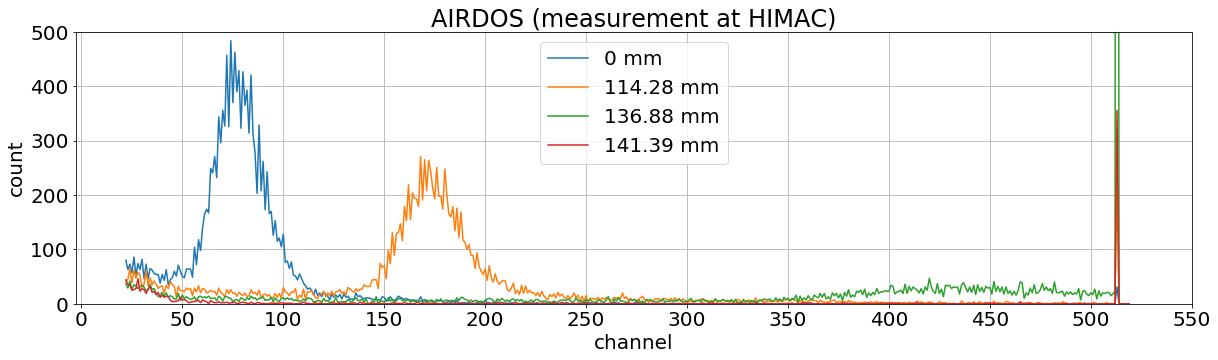

In [79]:
matplotlib.rcParams.update({'font.size': 20})

'''
plt.figure(figsize=(20,5))
rc['sum'][91:154].plot(c='blue')
rc['sum'][155:235].plot(c='red')
rc['sum'][236:296].plot(c='green')
rc['sum'][300:350].plot(c='yellow')
'''

ener1 = rc.ix[e1[0]:e1[1],22:520].sum()
ener2 = rc.ix[e2[0]:e2[1],22:520].sum()
ener3 = rc.ix[e3[0]:e3[1],22:520].sum()
ener4# = rc.ix[e4[0]:e4[1],22:520].sum()
 
plt.figure(figsize=(20,5))
#plt.yscale('log')

plt.plot(ener1, label='0 mm')
plt.plot(ener2, label='114.28 mm')
plt.plot(ener3, label='136.88 mm')
plt.plot(ener4, label='141.39 mm')
plt.ylim([0,500])
plt.legend()
plt.title('AIRDOS (measurement at HIMAC)')
plt.xlabel('channel')
plt.ylabel('count')
plt.xticks(range(0,600,50))
plt.grid()


# Spectrum Interactive

In [5]:
%matplotlib qt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import matplotlib.pyplot as plt

fto = './data/DATALOG.TXT' #  File to Open
l=[]
l.extend(range(0,548))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*')

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)


matplotlib.rcParams.update({'font.size': 20})

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(24,544)].sum(axis=1)
rc['sum'] = rc[range(22,544)].sum(axis=1)
#rc['sum']

plt.figure(figsize=(20,5))

#rc['sum'].plot()
rc.ix[:,'sum'].plot()

plt.title('AIRDOS (HIMAC, 2017-06)')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 11 s]')

points=plt.ginput(2)

plt.figure(figsize=(20,5))
rc.ix[points[0][0]:points[1][0],'sum'].plot()
points=plt.ginput(2)

ener = rc.ix[points[0][0]:points[1][0],22:520].sum()

plt.figure(figsize=(20,5))

plt.plot(ener)



IndexError: list index out of range

## Plot Flux

In [6]:

date = np.nan #pd.to_datetime('210317000000.00', format='%d%m%y%H%M%S.%f')
altitude = np.nan
LatDD = np.nan
LonDD = np.nan
for i,r in df.iterrows():
    if (r[0] == '$GPRMC'):
        date = pd.to_datetime(str(r[9])+str(r[1]), format='%d%m%y%H%M%S.%f',errors='coerce')
    '''
        Lat = float(r[3])
        Lon = float(r[5])

        if (r[4] == 'N'):
            Lats = 1
        else:
            Lats = -1

        if (r[6] == 'E'):
            Lons = 1
        else:
            Lons = -1

        LatDD = int(Lat/100)
        LatDD = LatDD + (Lat - 100.0*LatDD)/60.0
        LatDD = LatDD * Lats  

        LonDD = int(Lon/100)
        LonDD = LonDD + (Lon - 100.0*LonDD)/60.0
        LonDD = LonDD * Lons  
    '''       
    if (r[0] == '$GPGGA'):
        altitude = r[9]
    #r[20] = date
    df.set_value(i,20,date)
    df.set_value(i,21,altitude)
    #df.set_value(i,22,LatDD)
    #df.set_value(i,23,LonDD)

#df.to_csv('complete.csv')

In [7]:
#dfo = df[[25,26,27]].reset_index().groupby(20).sum()
#df.reset_index(inplace=True)
dfo = df
#dfo.reset_index(inplace=True)
dfo.drop(dfo[dfo[0]=='$GPRMC'].index, inplace=True)
dfo.drop(dfo[dfo[0]=='$GPGGA'].index, inplace=True)

#dfo = dfo[range(20,544)].groupby(20).sum()
#dfo

#df.iloc[20:40,0:30]
#dfo['sum'] = dfo[range(27,544)].sum(axis=1)

dfo.to_csv('radiation.csv')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


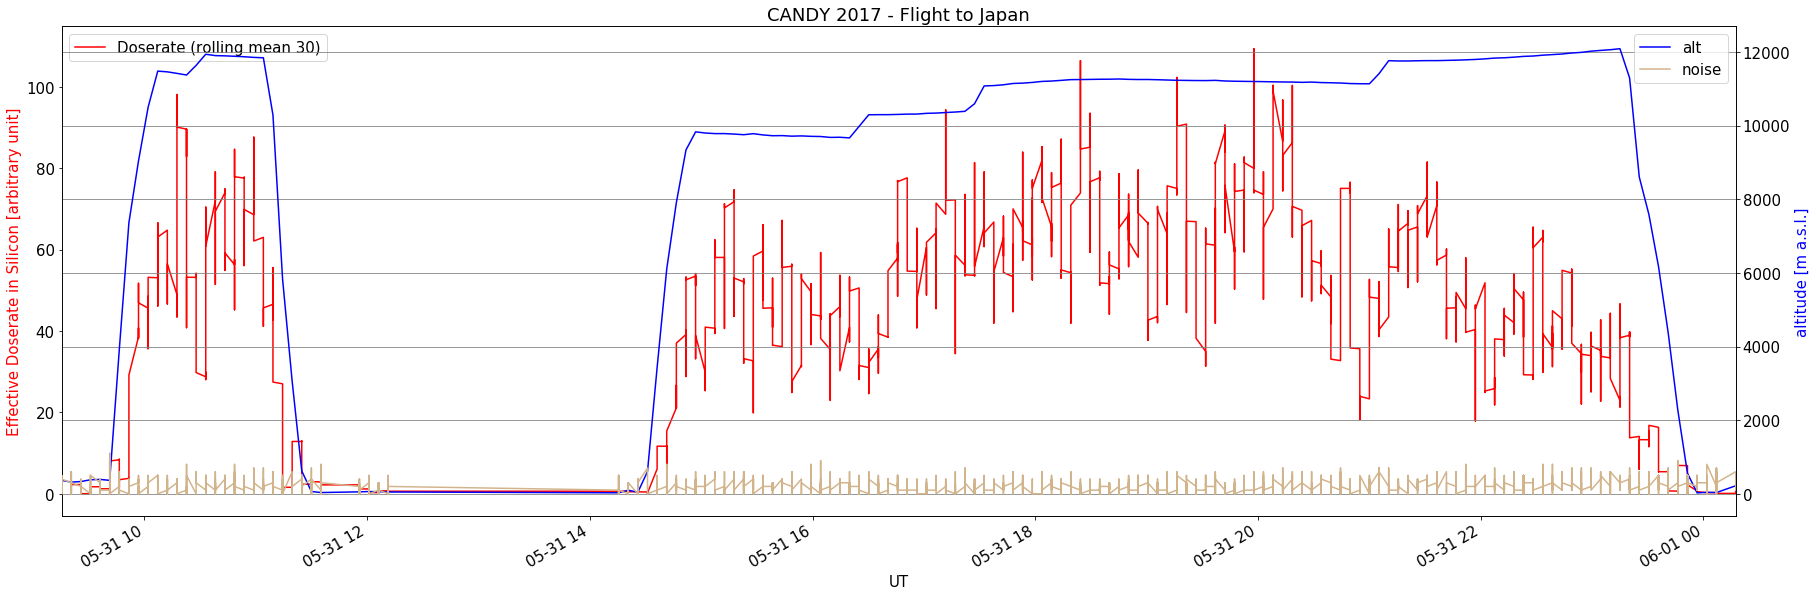

In [12]:
plt.figure(figsize=(30,10))
matplotlib.rcParams.update({'font.size': 15})

dfo = pd.read_table('radiation.csv', sep=',', header=0)
dfo = dfo.dropna(how='any')
dfo['20'] = pd.to_datetime(dfo['20'])
dfo = dfo.set_index(['20'])
NOISE_LEVEL=22
dfo[range(NOISE_LEVEL,500)] = dfo[range(NOISE_LEVEL,500)].mul(range(1,500+1-NOISE_LEVEL),axis=1)
dfo['rad'] = dfo[range(NOISE_LEVEL,500)].sum(axis=1)
xx = dfo.loc['2017-05-31 09:00:00':'2017-06-01 01:00:00']
#xx = dfo
#xx = dfo
#pandas.rolling_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)
WINDOW = 30
xx['rad'] = pd.rolling_mean(xx['rad'],WINDOW)

xx['rad'].plot(c='r', label='Doserate (rolling mean '+str(WINDOW)+')')
plt.xlabel('UT')
plt.ylabel('Effective Doserate in Silicon [arbitrary unit]', color='red')
#, xticks=['2017-03-27 00:00','2017-03-27 12:00','2017-03-28 00:00','2017-03-28 12:00','2017-03-29 00:00'],figsize=(20,5))
plt.legend(loc=2)

ax = plt.twinx()
xx['21'].plot(c='b',label='alt')
plt.plot(xx['18']*100,c='tan',label='noise',zorder=10)
#plt.plot(xx[19]*5000-xx['18']*100,c='green',label='corr')
plt.ylabel('altitude [m a.s.l.]', color='blue')
#plt.ylim([0,500])
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()
plt.title('CANDY 2017 - Flight to Japan')


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is tryi

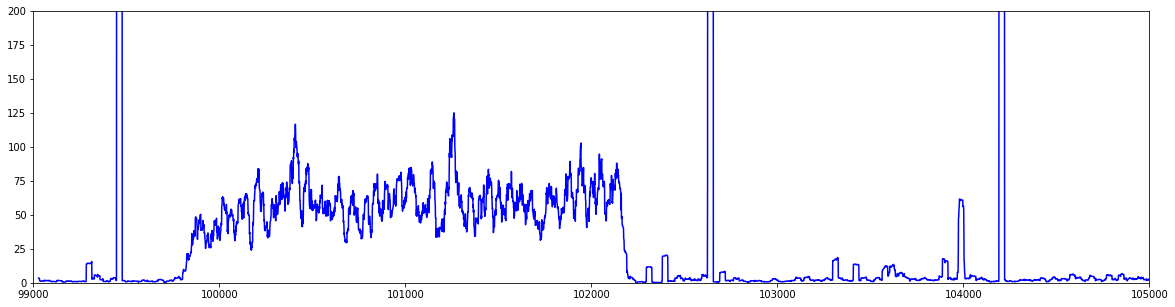

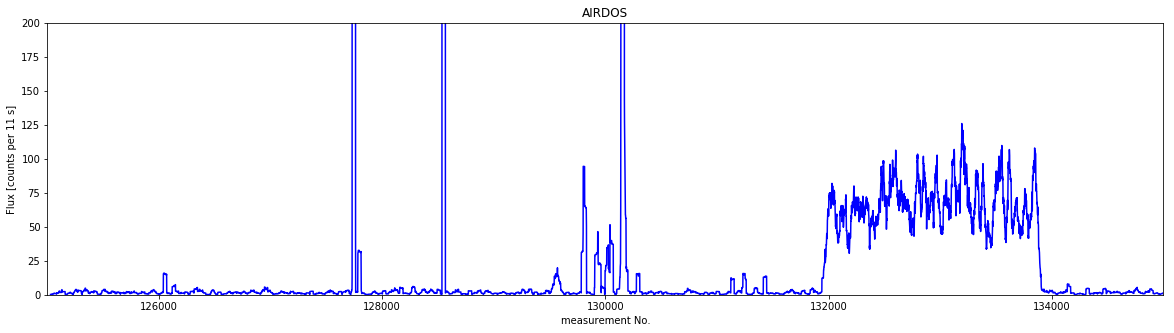

In [33]:
rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(24,544)].sum(axis=1)
#rc['sum'] = rc[range(21,544)].sum(axis=1)
#rc['sum']


plt.figure(figsize=(20,5))
plt.ylim([0,200])
NOISE_LEVEL=21
xx = rc.ix[99000:105000]
xx[range(NOISE_LEVEL,500)] = xx[range(NOISE_LEVEL,500)].mul(range(1,500+1-NOISE_LEVEL),axis=1)
xx['rad'] = xx[range(NOISE_LEVEL,500)].sum(axis=1)
WINDOW = 30
xx['rad'] = pd.rolling_mean(xx['rad'],WINDOW)
xx['rad'].plot(c='b')

plt.figure(figsize=(20,5))
plt.ylim([0,200])
xx = rc.ix[125000:135000]
xx[range(NOISE_LEVEL,500)] = xx[range(NOISE_LEVEL,500)].mul(range(1,500+1-NOISE_LEVEL),axis=1)
xx['rad'] = xx[range(NOISE_LEVEL,500)].sum(axis=1)
WINDOW = 30
xx['rad'] = pd.rolling_mean(xx['rad'],WINDOW)
xx['rad'].plot(c='b')

plt.title('AIRDOS')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 11 s]')

In [34]:
xx

,0,1,2,3,4,5,6,7,8,9,...,539,540,541,542,543,544,545,546,547,rad
125000,NaN,30687,985,571.0,822.0,638.0,571,437,487.0,293,...,0.0,0.0,0.0,0.0,0.0,16.0,1.0,7.0,0.0,NaN
125001,NaN,30688,972,549.0,783.0,661.0,594,462,451.0,286,...,0.0,0.0,0.0,0.0,0.0,19.0,0.0,1.0,0.0,NaN
125002,NaN,30689,895,574.0,772.0,692.0,613,456,469.0,288,...,0.0,0.0,0.0,0.0,0.0,19.0,0.0,2.0,0.0,NaN
125003,NaN,30690,996,521.0,783.0,629.0,559,454,489.0,300,...,0.0,0.0,0.0,0.0,0.0,18.0,0.0,1.0,0.0,NaN
125004,NaN,30691,922,547.0,765.0,631.0,624,486,501.0,265,...,0.0,0.0,0.0,0.0,0.0,18.0,0.0,1.0,0.0,NaN
125005,NaN,30692,953,514.0,799.0,664.0,580,442,484.0,281,...,0.0,0.0,0.0,0.0,0.0,18.0,0.0,1.0,0.0,NaN
125006,NaN,30693,907,538.0,791.0,670.0,610,426,500.0,280,...,0.0,0.0,0.0,0.0,0.0,17.0,1.0,2.0,0.0,NaN
125007,NaN,30694,976,590.0,802.0,676.0,620,426,490.0,243,...,0.0,0.0,0.0,0.0,0.0,17.0,0.0,2.0,0.0,NaN
125008,NaN,30695,936,596.0,816.0,650.0,574,442,489.0,301,...,0.0,0.0,0.0,0.0,0.0,18.0,1.0,2.0,0.0,NaN
125009,NaN,30696,895,539.0,753.0,684.0,596,456,496.0,293,...,0.0,0.0,0.0,0.0,0.0,19.0,0.0,1.0,0.0,NaN
